In [3]:
# Dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt 

In [4]:
# Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [5]:
# setting GPU Memory to decrease the Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
    

In [6]:
# Paths directory
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [7]:
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [8]:
POS_PATH


'data\\positive'

In [9]:
!tar -xf lfw.tgz

tar: Error opening archive: Failed to open 'lfw.tgz'


In [10]:
# Move LFW Uncompress Images
for directory in os.listdir('/Users/user/OneDrive/Desktop/Face_Recognition/lfw'):
    for file in os.listdir(os.path.join('/Users/user/OneDrive/Desktop/Face_Recognition/lfw', directory)):
        EX_PATH = os.path.join('/Users/user/OneDrive/Desktop/Face_Recognition/lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [11]:
# To generate unique image names
import uuid

In [12]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\f4371e8f-f472-11ed-b6c0-c0b883ab4d2e.jpg'

In [13]:
os.listdir('/Users/user/OneDrive/Desktop/Face_Recognition/lfw')

['Aaron_Eckhart',
 'Aaron_Guiel',
 'Aaron_Patterson',
 'Aaron_Peirsol',
 'Aaron_Pena',
 'Aaron_Sorkin',
 'Aaron_Tippin',
 'Abbas_Kiarostami',
 'Abba_Eban',
 'Abdel_Aziz_Al-Hakim',
 'Abdel_Madi_Shabneh',
 'Abdel_Nasser_Assidi',
 'Abdoulaye_Wade',
 'Abdulaziz_Kamilov',
 'Abdullah',
 'Abdullah_Ahmad_Badawi',
 'Abdullah_al-Attiyah',
 'Abdullah_Gul',
 'Abdullah_Nasseef',
 'Abdullatif_Sener',
 'Abdul_Majeed_Shobokshi',
 'Abdul_Rahman',
 'Abel_Aguilar',
 'Abel_Pacheco',
 'Abid_Hamid_Mahmud_Al-Tikriti',
 'Abner_Martinez',
 'Abraham_Foxman',
 'Aby_Har-Even',
 'Adam_Ant',
 'Adam_Freier',
 'Adam_Herbert',
 'Adam_Kennedy',
 'Adam_Mair',
 'Adam_Rich',
 'Adam_Sandler',
 'Adam_Scott',
 'Adelina_Avila',
 'Adel_Al-Jubeir',
 'Adisai_Bodharamik',
 'Adolfo_Aguilar_Zinser',
 'Adolfo_Rodriguez_Saa',
 'Adoor_Gopalakarishnan',
 'Adriana_Lima',
 'Adriana_Perez_Navarro',
 'Adrianna_Zuzic',
 'Adrian_Annus',
 'Adrian_Fernandez',
 'Adrian_McPherson',
 'Adrian_Murrell',
 'Adrian_Nastase',
 'Adrien_Brody',
 'Afton_S

In [34]:
cap = cv2.VideoCapture(0)  # camera device number
while cap.isOpened(): 
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    if cv2.waitKey(2) & 0XFF == ord('a'):
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)
    if cv2.waitKey(2) & 0XFF == ord('p'):
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)
    cv2.imshow('Image Collection', frame)
    if cv2.waitKey(2) & 0XFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [24]:
frame

array([[[ 50,  53,  57],
        [ 51,  53,  55],
        [ 53,  53,  51],
        ...,
        [197, 202, 199],
        [196, 201, 198],
        [195, 200, 197]],

       [[ 51,  54,  58],
        [ 52,  54,  56],
        [ 53,  53,  51],
        ...,
        [197, 202, 199],
        [198, 203, 200],
        [197, 202, 199]],

       [[ 52,  55,  59],
        [ 53,  55,  57],
        [ 54,  54,  54],
        ...,
        [200, 203, 200],
        [200, 205, 202],
        [200, 205, 202]],

       ...,

       [[ 74,  69,  62],
        [ 74,  69,  62],
        [ 74,  70,  60],
        ...,
        [201, 204, 201],
        [201, 204, 201],
        [201, 204, 201]],

       [[ 80,  75,  64],
        [ 76,  71,  60],
        [ 73,  68,  57],
        ...,
        [200, 202, 202],
        [201, 204, 201],
        [201, 204, 201]],

       [[ 72,  67,  56],
        [ 71,  66,  55],
        [ 70,  65,  54],
        ...,
        [200, 202, 202],
        [200, 203, 200],
        [200, 203, 200]]

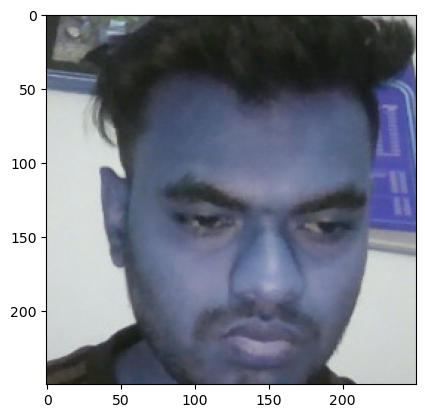

In [25]:
plt.imshow(frame)

In [26]:
frame[:250, :250, :].shape

(250, 250, 3)

In [27]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))
            
        data.append(img)
    
    return data

In [28]:
import os
import uuid

In [35]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.png').take(3000)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.png').take(3000)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(3000)

In [36]:
dir_test = anchor.as_numpy_iterator()

In [37]:
print(dir_test.next())

b'data\\anchor\\Image Collection_screenshot_17.05.2023.png'


In [38]:
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100,100))
    img = img / 255.0
    return img

In [39]:
img = preprocess('data\\anchor\\Image Collection_screenshot_17.05.2023.png')

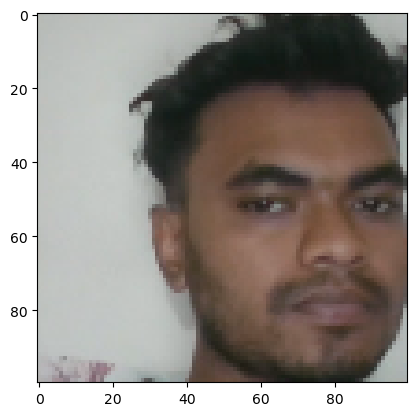

In [40]:
plt.imshow(img)

In [41]:
img.numpy().min() 

0.055882353

In [42]:
img.numpy().max() 

0.79607844

In [43]:
dataset.map(preprocess)

NameError: name 'dataset' is not defined

In [44]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [45]:
data

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [46]:
samples = data.as_numpy_iterator()

In [47]:
example = samples.next()

In [48]:
example

(b'data\\anchor\\Image Collection_screenshot_17.05.2023.png',
 b'data\\positive\\Image Collection_screenshot_17.05.2023.png',
 1.0)

In [49]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [50]:
res = preprocess_twin(*example)

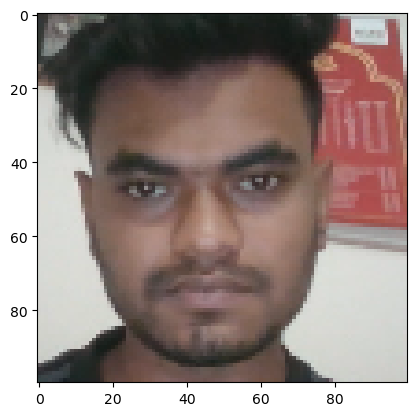

In [51]:
plt.imshow(res[1])

In [52]:
res[2]

1.0

In [53]:
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [54]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [55]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [56]:
inp = Input(shape=(100,100,3), name='input_image')

In [57]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [58]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [59]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [60]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [61]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [62]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [63]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [64]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [65]:
embedding = make_embedding()

In [66]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

In [67]:
class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [68]:
l1 = L1Dist()

In [69]:
l1(anchor_embedding, validation_embedding)

NameError: name 'anchor_embedding' is not defined

In [70]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [71]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [72]:
siamese_layer = L1Dist()

In [73]:
distances = siamese_layer(inp_embedding, val_embedding)

In [74]:
classifier = Dense(1, activation='sigmoid')(distances)

In [75]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [76]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [77]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [78]:
def make_siamese_model(): 
    input_image = Input(name='input_img', shape=(100,100,3))
    validation_image = Input(name='validation_img', shape=(100,100,3))
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    classifier = Dense(1, activation='sigmoid')(distances)
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [79]:
siamese_model = make_siamese_model()

In [80]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [81]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [82]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

In [83]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [84]:
test_batch = train_data.as_numpy_iterator()

In [85]:
batch_1 = test_batch.next()

In [86]:
X = batch_1[:2]

In [87]:
y = batch_1[2]

In [88]:
y

array([1.], dtype=float32)

In [89]:
tf.losses.BinaryCrossentropy??

In [90]:
@tf.function
def train_step(batch):
    with tf.GradientTape() as tape:     
        X = batch[:2]
        y = batch[2]
        yhat = siamese_model(X, training=True)
        loss = binary_cross_loss(y, yhat)
    print(loss)
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    return loss

In [91]:
from tensorflow.keras.metrics import Precision, Recall

In [92]:
def train(data, EPOCHS):
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        r = Recall()
        p = Precision()
        for idx, batch in enumerate(data):
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [101]:
EPOCHS = 1

In [102]:
train(train_data, EPOCHS)


 Epoch 1/1
1/1 [==============================] - 2s 2s/step
0.0008938133 1.0 1.0


In [103]:
from tensorflow.keras.metrics import Precision, Recall

In [104]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [105]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 [==============================] - 0s 338ms/step


In [106]:
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1]

In [107]:
[1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]

[1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]

In [108]:
y_true

array([1.], dtype=float32)

In [109]:
m = Recall()
m.update_state(y_true, y_hat)
m.result().numpy()

1.0

In [110]:
m = Precision()
m.update_state(y_true, y_hat)
m.result().numpy()

1.0

In [111]:
r = Recall()
p = Precision()
for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 
print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 0s 234ms/step
1.0 1.0


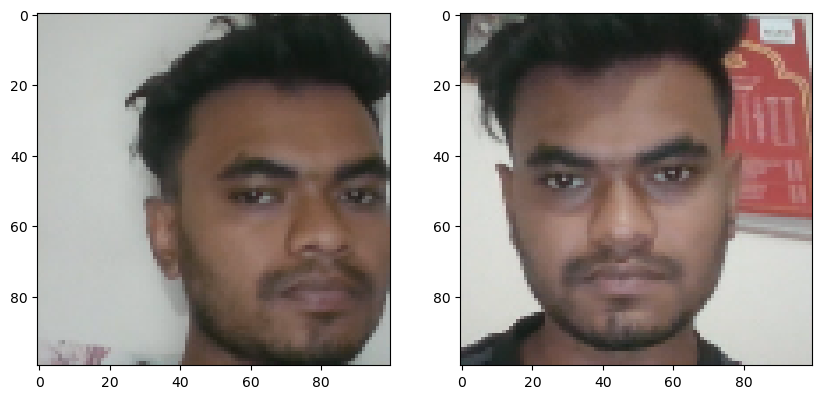

In [112]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(test_input[0])
plt.subplot(1,2,2)
plt.imshow(test_val[0])
plt.show()

In [113]:
siamese_model.save('siamesemodelv2.h5')

In [114]:
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [115]:
siamese_model.predict([test_input, test_val])

1/1 [==============================] - 0s 391ms/step


array([[0.999154]], dtype=float32)

In [116]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [120]:
os.listdir(os.path.join('application_data', 'verification_images'))

['Image Collection_screenshot_17.05.2023.png']

In [138]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [139]:
5/10

0.5

In [140]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\Image Collection_screenshot_17.05.2023.png
application_data\verification_images\Verification_screenshot_17.05.2023.png


In [141]:
def verify(model, detection_threshold, verification_threshold):
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    detection = np.sum(np.array(results) > detection_threshold)
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    return results, verified

In [150]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    cv2.imshow('Verification', frame)
    if cv2.waitKey(10) & 0xFF == ord('v'):
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 420ms/step
True
1/1 [==============================] - 0s 312ms/step
True


In [153]:
np.sum(np.squeeze(results) > 0.5)

1

In [154]:
results

[array([[0.57266605]], dtype=float32)]